In [1]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[22 22 22 ... 19 19 19]
 [22 22 22 ... 19 19 19]
 [22 22 22 ... 19 19 20]
 ...
 [46 48 50 ... 28 35 47]
 [54 54 55 ... 23 26 30]
 [58 57 55 ... 25 26 23]]
[[18 18 18 ... 15 15 15]
 [18 18 18 ... 15 15 15]
 [18 18 18 ... 15 15 16]
 ...
 [42 44 46 ... 24 31 43]
 [50 50 51 ... 19 22 26]
 [54 53 51 ... 21 22 19]]


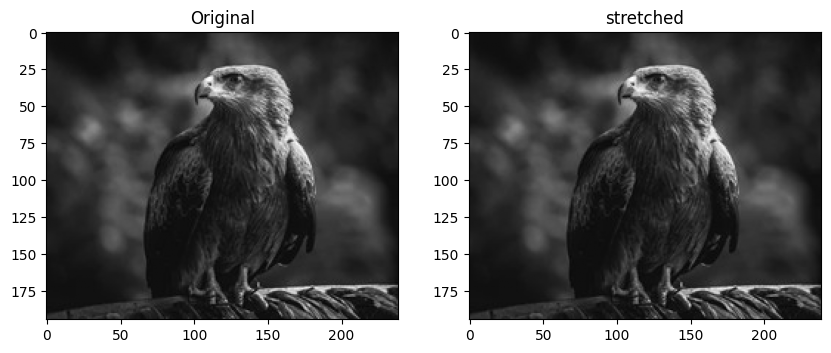

In [6]:
#contrast stretching
image = cv2.imread('/content/Picture8.jpg',0)
print(image)

min_pixcel =np.min(image)
max_pixcel =np.max(image)
stretched = (image- min_pixcel)*(255/(max_pixcel-min_pixcel))
stretched = stretched.astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(image,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(stretched,cmap='gray')
plt.title('stretched')
print(stretched)
plt.show()

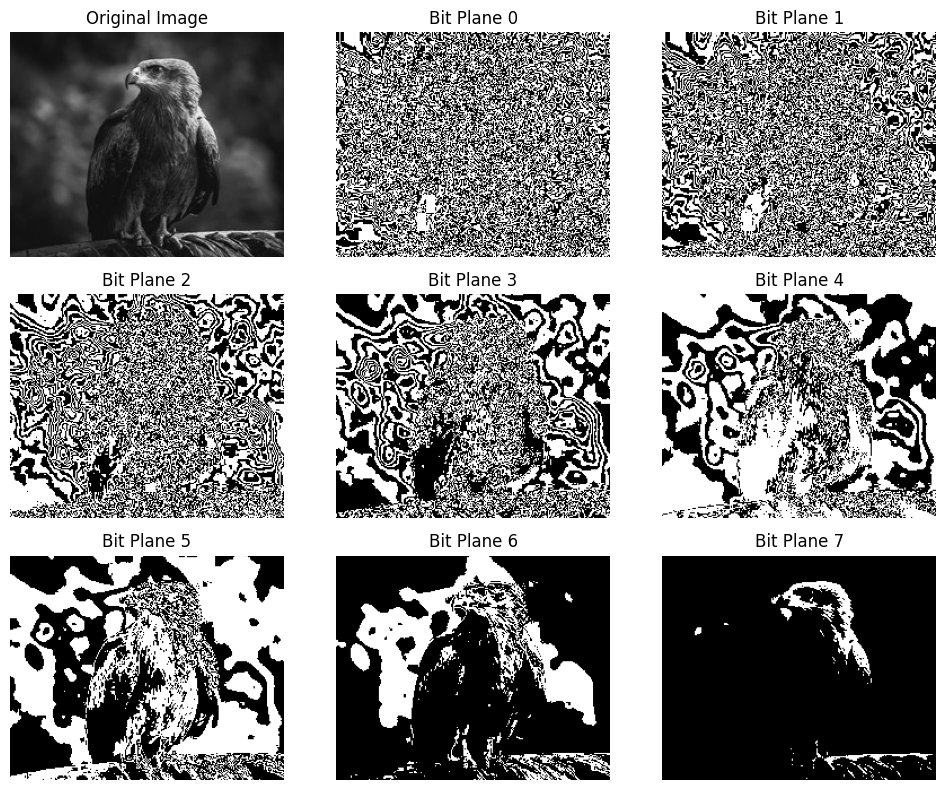

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('/content/Picture9.jpg', cv2.IMREAD_GRAYSCALE)


if img is None:
    print("Error: Could not load image. Please check the file path.")
else:

    bit_planes = [(img & (1 << i)) >> i for i in range(8)]


    plt.figure(figsize=(10, 8))
    plt.subplot(3, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    for i in range(8):
        plt.subplot(3, 3, i + 2)
        plt.imshow(bit_planes[i], cmap='gray')
        plt.title(f'Bit Plane {i}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

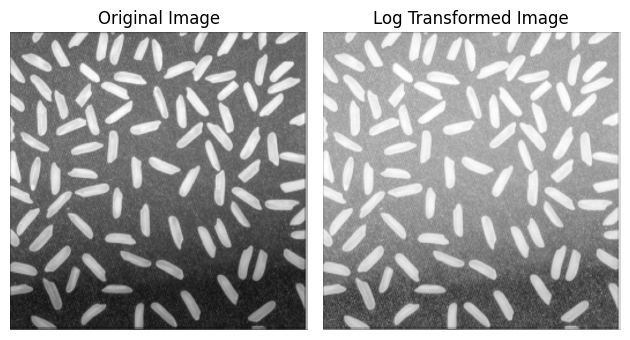

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/Picture10.png', 0)


c = 255 / np.log(1 + np.max(img))
log_img = c * np.log(1 + img.astype(np.float32))

log_img = np.uint8(log_img)


plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_img, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


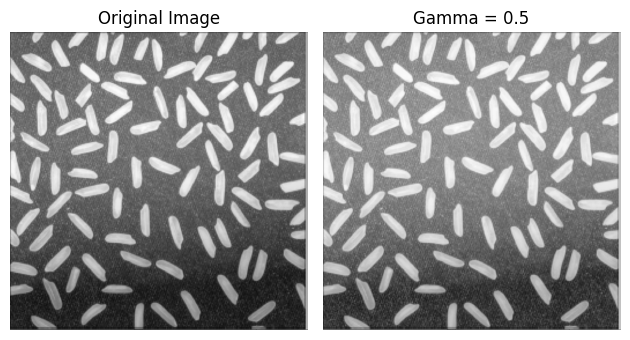

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('/content/Picture10.png', 0)


img_normalized = img / 255.0


gamma = 0.5
c = 1
gamma_corrected = c * np.power(img_normalized, gamma)


gamma_corrected = np.uint8(gamma_corrected * 255)


plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f'Gamma = {gamma}')
plt.axis('off')

plt.tight_layout()
plt.show()


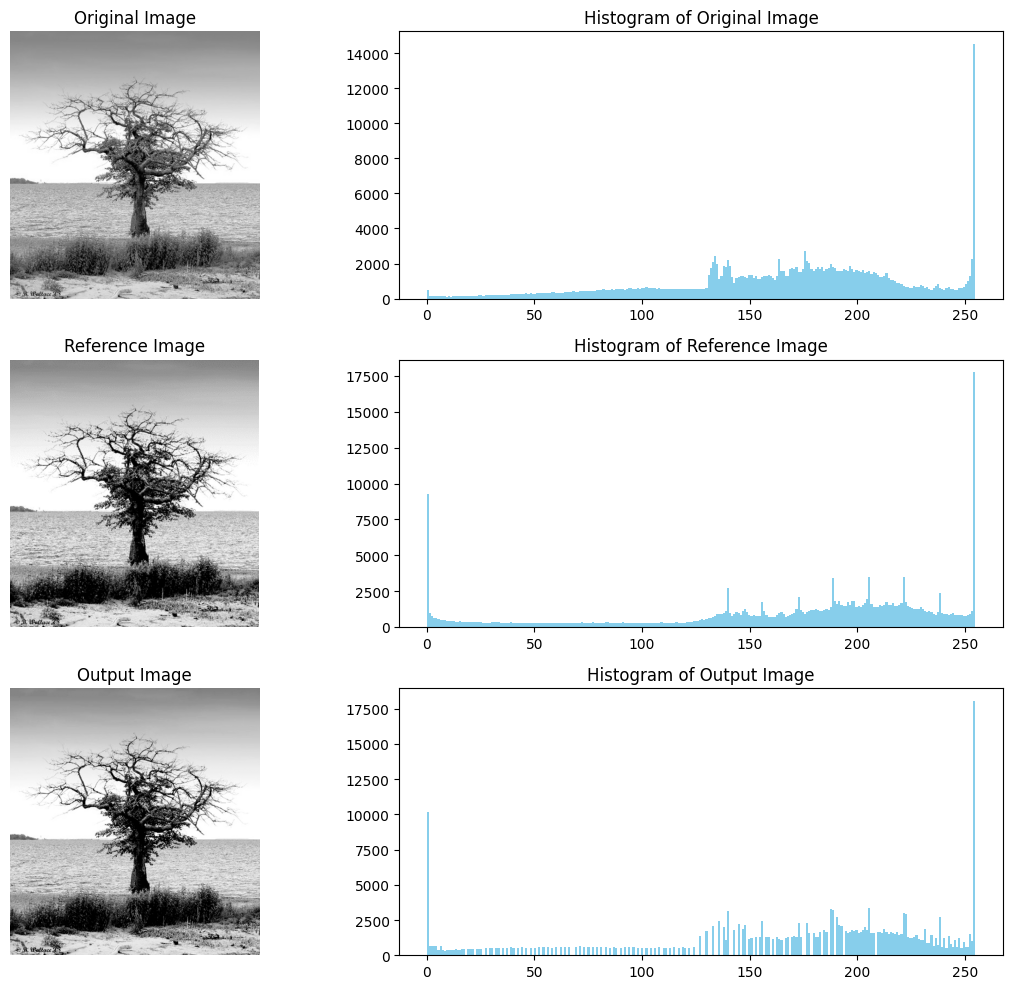

In [ ]:


import cv2
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms


original_img = cv2.imread('/content/Picture11.jpg')
reference_img = cv2.imread('/content/Picture13.png')


if original_img.shape[2] == 3:
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

if reference_img.shape[2] == 3:
    reference_img = cv2.cvtColor(reference_img, cv2.COLOR_BGR2GRAY)


matched_img = match_histograms(original_img, reference_img)

plt.figure(figsize=(12, 10))


plt.subplot(3, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(original_img.ravel(), bins=256, color='skyblue')
plt.title('Histogram of Original Image')


plt.subplot(3, 2, 3)
plt.imshow(reference_img, cmap='gray')
plt.title('Reference Image')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(reference_img.ravel(), bins=256, color='skyblue')
plt.title('Histogram of Reference Image')


plt.subplot(3, 2, 5)
plt.imshow(matched_img, cmap='gray')
plt.title('Output Image')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(matched_img.ravel(), bins=256, color='skyblue')
plt.title('Histogram of Output Image')

plt.tight_layout()
plt.show()


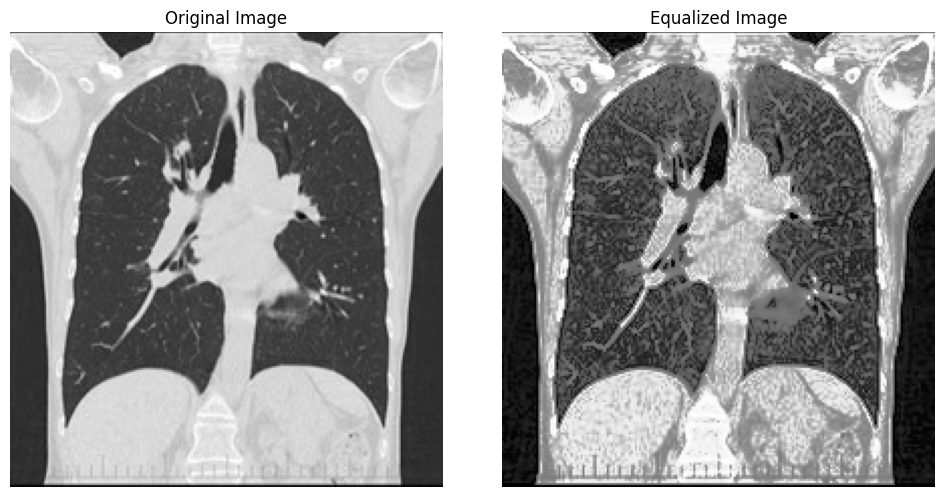

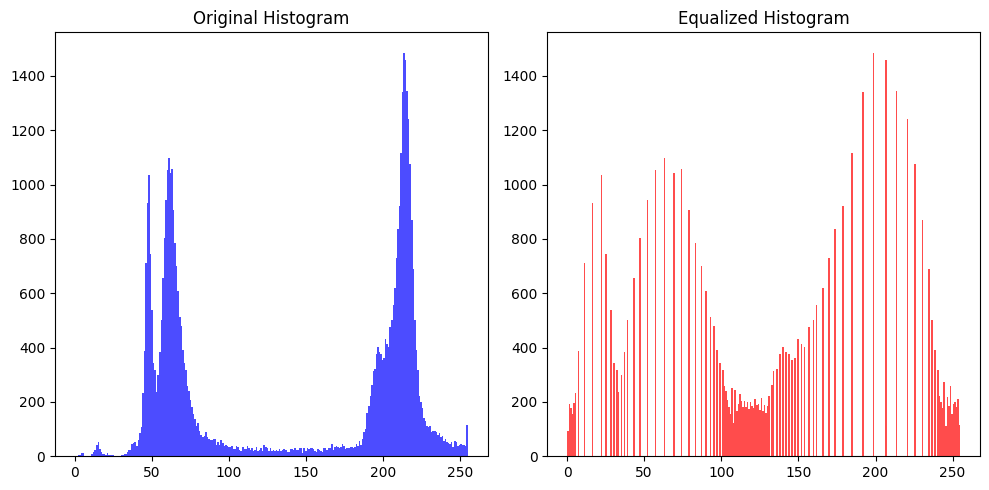

In [ ]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('/content/Picture15.jpg', 0)


equalized_img = cv2.equalizeHist(img)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(img.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Original Histogram')

plt.subplot(1, 2, 2)
plt.hist(equalized_img.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()